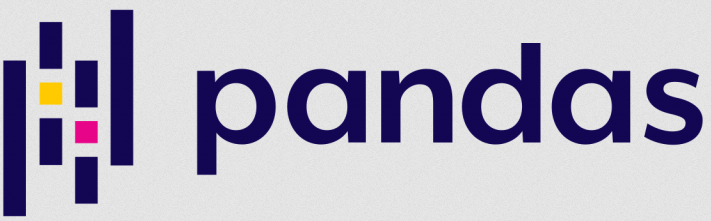

In [1]:
import pandas as pd

# Pandas

[Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) is a Python library for manipulating "panel data" or tables. Pandas does this through two new data types:
1. `Series`
2. `DataFrame`

A `DataFrame` is a table. It is made up of rows ("records") and columns ("fields").

Each individual row or column is a pandas `Series` when not in a `DataFrame`.

Here is an example of a `DataFrame` created from a `.csv` file:

```python
import pandas as pd
df = pd.read_csv('3d_interaction.csv')
df
```

In [2]:
import pandas as pd
df = pd.read_csv('3d_interaction.csv')
df

,Axial Force,Moment X,Moment Y,N.A. Depth,N.A. Angle,D_t,eps_s
0,1337.874756,0.000097,0.000008,52.728630,0.0,21.559002,-0.002069
1,1337.874756,0.000096,0.000030,57.686142,10.0,23.585966,-0.002069
2,1337.874756,0.000112,0.000052,60.890884,20.0,24.896286,-0.002069
3,1337.874756,0.000094,0.000063,62.245510,30.0,25.450142,-0.002069
4,1337.874756,0.000074,0.000077,61.708824,40.0,25.230709,-0.002069
...,...,...,...,...,...,...,...
2515,-553.349976,0.000071,-0.000087,0.000000,310.0,24.244658,9.999990
2516,-553.349976,0.000083,-0.000074,0.000000,320.0,25.230709,9.999990
2517,-553.349976,0.000093,-0.000060,0.000000,330.0,25.450142,9.999990
2518,-553.349976,0.000100,-0.000044,0.000000,340.0,24.896284,9.999990


Here is an example of a `Series` being extracted from the `DataFrame`
```python
axial_force = df.loc[:,"Axial Force"] # .loc => "locate and extract" records/fields by name
row_4 = df.iloc[4] # .iloc => "(integer) locate and extract" -> records/fields by number
```

In [10]:
axial_force = df.loc[:,"Axial Force"]
row_4 = df.iloc[4]

# How to make a `DataFrame`

Commonly, `DataFrame`s are created by reading or importing data from somewhere else instead of typing data directly into Python.

## 1. Read from a file

Built in to pandas are several "read_..." functions that can read various common file types. 

| | | |
|----------|------------|----------|
|`pd.read_csv()`|`pd.read_excel()`|`pd.read_html()`|
|`pd.read_clipboard()`|`pd.read_table()`|`pd.read_xml()`|
|Plus other "big data"-style file types...

e.g.

```python
df1 = pd.read_csv('3d_interaction.csv')
df2 = pd.read_excel('test_model_results_piers.xlsx')
```

## 2. Read from a live Excel sheet

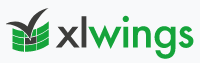

Use the library [xlwings](https://www.xlwings.org/) to interact with a live Excel worksheet

```python
import xlwings
df = xlwings.load() # Be sure to have an open instance of Excel before running this line
```

## 3. Create manually in Python

Use the `DataFrame()` constructor to build dataframes from lists and/or dictionaries.

### From a list of lists
Building from a list of lists is like building the dataframe "by row" (or "by records")
```python
# Each sub list represents a record (row) in the table
df = pd.DataFrame(
    data = [
        ["row 0 data 0", "row 0 data 1", "row 0 data 2"], 
        ["row 1 data 0", "row 1 data 1", "row 1 data 2"],
    ],
    columns = ["A", "B", "C"] # column names are optional
)
```

### From a dictionary
Building from a dictionary is like building the dataframe "by column" (or "by fields")
```python
# Each dictionary key represents the column name
# The list of values assigned to it are the values in that column
df = pd.DataFrame(
    data = {"Col A": [1, 2, 3, 4],
            "Col B": [10, 12, 13, 14],
           }
)
```

# (Some) Characteristics of `DataFrame`s

## Two Axes

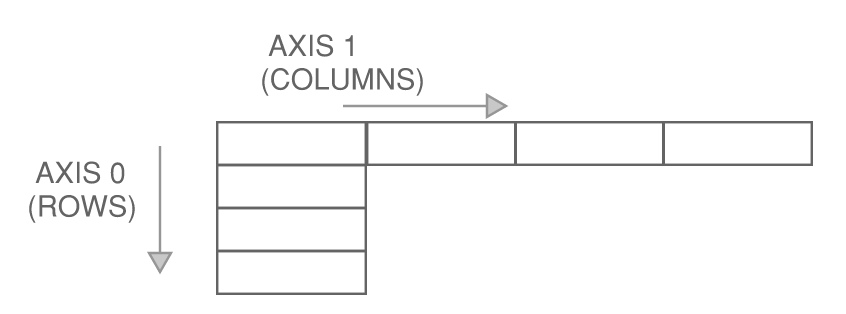

## Vectorized operations

In Excel, you can think of data in a range as a series of individual cells that you can manipulate.

In Python, you can think of data in a list (or dictionary) as a series of individual items which you loop over to manipulate individually.

In a Pandas DataFrame, you perform operations on whole columns. You do not loop over cells in a DataFrame. Instead you perform __vectorized__ operations on the column (or a selection of data within the column).

> In this way, you describe what you want to happen rather on how you want it to be done

### Example: add two lists of numbers together
Here is data represented as two lists:
```python
col_a = [12, 34, 67, 89, 1.2, 34, 23.1]
col_b = [100, 100, 100, 200, 200, 200, 200]
```

In [229]:
col_a = [12, 34, 67, 89, 1.2, 34, 23.1]
col_b = [100, 100, 100, 200, 200, 200, 200]

#### In typical Python (not vectorized)

```python
col_c = []
for idx, elem_a in enumerate(col_a):
    elem_b = col_b[idx]
    col_c.append(elem_a + elem_b)
```

#### With Pandas (vectorized)

```python
df = pd.DataFrame(data={"A": col_a, "B": col_b})
df["C"] = df["A"] + df["B"]
```

## Data selection (masking)

Often, we do not want to perform operations on a whole column or on all rows but only a subset of the data which meet certain conditions.

To find the rows we want, we create some kind of a condition to test for based on the values in one column.

e.g.
```python
mask = df['B'] >= 200
```

Once we have created our boolean `Series`, we use it as a "mask" to only locate the rows which correspond to `True` in the `Series`. In the mask analogy, rows which are `False` are "opaque" whereas rows that are `True` are "transparent" and can "pass-through" the mask.

```python
df.loc[mask]
```

From there, we can create more complicated masks by combining conditions with various logical operators such as `&`, `|`, `~` (and, or, not).

```python
mask_1 = df['B'] >= 200
mask_2 = df['A'] > 25
mask = mask_1 & mask_2
df.loc[mask]
```


## Indexes

`DataFrame`s have both row indexes and column indexes. When the dataframe is represented in Jupyterlab, the indexes are displayed in __bold__.

* Indexes can be set, changed, and reset (back to basic integers)
* Data is located in a dataframe by index
* Indexes can have multiple _levels_ (i.e. a multi-level index)

The row index can be set directly with `df.index = <data for index>`

The columns index can be set directly with `df.columns = <data for index>`

The index can be reset with `df.reset_index()`

Example with ETABS export data:

```python
df = pd.read_excel('test_model_results_piers.xlsx') # We will not set any options to get the full dirty data

df.columns = df.loc[0] # Set the column index to be the data on row 0
df = df.drop([0, 1]).reset_index() # Drop the extra header rows and reset the row index
```

However it is easier to have `.read_excel()` do this work for us automatically. Use `[SHIFT]-[TAB]` keys to learn about the additional arguments you can pass to read the file the way you want.

```python
df = pd.read_excel('test_model_results_piers.xlsx', header=1, skiprows=[2])
df.set_index("Pier")
```

# `DataFrame` methods

There are _hundreds_ of methods on `DataFrame` and `Series`. We will start by learning some basic ones:

1. `.head` (and `.tail`)
2. `.loc` (and `.iloc`)
3. `.transpose()`
4. `.unique()`


## 1. `.head()` and `.tail()`

These are fairly simple methods for viewing the first `n` rows of data in the dataframe (`.head`) or the last `n` rows of data (`.tail`). 

Often when you are loading a dataframe, it is going to be quite large. You want to make sure that the operation you have just performed (whether loading from a file or some other operation) is successful. 

A quick way to do this is to look at the first five or so rows. The first five or so rows is often enough to give you a sense if things are looking correct. Rarely do you need to review the whole frame to do this.

e.g. 
```python
df = pd.read_excel('test_model_results_piers.xlsx', header=1, skiprows=[2])
df.head()
```

By default, both `.head` and `.tail` give you the first (or last) five rows. To see more rows, pass the number of rows you want to see, e.g. 

```python
df.head(10) # First 10 rows
df.tail(7) # Last 7 rows
```

## 2. `.loc` and `.iloc`


To access and manipulate specific locations within a `DataFrame`, use `.loc` and/or `.iloc`.

### Using `.loc`

```python
df.loc[rows, columns]
```

The `.loc` method gives an indexing-style access to the dataframe, similar to a list or a dict. However, because a `DataFrame` is a two-dimensional array (rows x columns), you have to index both the rows and the columns you want.

> Use a comma, `,` to separate the row indexes and the column indexes.

### `.loc` deals in _indexes_

```python
df = pd.read_excel('test_model_results_piers.xlsx', header=1, skiprows=[2])
```

To locate data, you can pass various types of data into the `rows` and `columns` arguments.

1. You can pass specific index names or a list of index names

```python
df.loc[[0, 1, 2, 3], ["P", "V2"]] # Select rows 0 - 3 and columns "P" and "V2"
df.loc[:, ["V2", "V3"]] # Select all rows but only columns "V2" and "V3"
df.loc[400] # Select row 400 and all columns
df.loc[400, :] # This is the same as above

# Change the row indexes to pier name
df_piers = df.set_index('Pier')
df_piers.loc[["A-NE", "A-NW"], ["P", "V2"]]
```

2. You can pass a boolean mask

The boolean mask must match the indexes used in the dataframe it is masking.

```python
mask = df["Output Case"] == "SW"
df.loc[mask, ["M2", "M3"]] # Selects only those rows that pass the mask and columns "M2" and "M3"
```

### `.loc` vs `.iloc`

With `.loc`, you use __index names__. With `.iloc`, you use __index positions__.

Regardless of what you set the index to, you will always be able to access data by their position within the index with `.iloc`.

So, if you are in a situation where you might have dynamic column names but you _know_ that the data will always be in, say, the 6th column, then you can use `.iloc[:,6]` to get it.

```python
df.iloc[[0, 1, 2, 3], [6, 7]] # df.loc[[0, 1, 2, 3], ["P", "V2"]]
```

## 3. `.transpose()`

Use `.transpose()` to flip the axes: columns become rows, rows become columns.

Since `pandas` primarily performs operations on _columns_, it can be useful to flip the axes if you need to perform operations on _rows_

```python
df_t = df.transpose()
````

## 4. `.unique()`

Use `.unique()` to find the unique values in a column.

```python
df["Output Case"].unique()
```



# Examples

## 1. 

## 2. Calculating a new load case and adding it to the table

The pier results export from ETABS (the .xlsx file) has results for various load cases including `SW` and `SDL`. 

What if you wanted to add a load case to your data that represented the total dead load, say a `DL` case? How would you do this in Excel?

```python
df = pd.read_excel('test_model_results_piers.xlsx', header=1, skiprows=[2])
```

1. Look at the data and identify some of its characteristics
> Try just selecting the `SW` load case and the `SDL` load case separately and inspect them
```python
sw_mask = df["Output Case"] == "SW"
sdl_mask = df["Output Case"] == "SDL"
df_sw = df.loc[sw_mask]
df_sdl = df.loc[sdl_mask]
```
> Notice how the columns of `Story`, `Pier`, `Case Type`, `Step Type`, `Location` have identical data in them. We can use this fact to combine the numerical data.

2. We now have `df_sw` and `df_sdl`, each containing only the results of their respective load cases. Since the data in the other "key" columns are identical, lets set them as the indexes of each table. Since we have each load case separated out into sub-tables, we can drop their respective "Output Case" columns since those are the columns that have different values.
```python
df_sw = df_sw.set_index(["Story", "Pier", "Case Type", "Step Type", "Location"]).drop("Output Case", axis=1)
df_sdl = df_sdl.set_index(["Story", "Pier", "Case Type", "Step Type", "Location"]).drop("Output Case", axis=1)
```

3. Now, we have two sub-tables with the same indexes: `df_sw` and `df_sdl`. __Because their indexes are the same__, we can now add both dataframes together directly.

```python
df_dl = df_sw + df_sdl
```

4. To add the the data in `df_dl` to our original dataframe, we need `df_dl` to have a similar index to our existing dataframe so we will reset the index on `df_dl`

```python
df_dl["Output Case"] = "DL"
df_dl = df_dl.reset_index()
```

5. We can use the pandas function `concat` to append the `df_dl` to the original `df`

```python
new_df = pd.concat([df, df_dl])
new_df = new_df.reset_index(drop=True)
```

In [262]:
new_df

,Story,Pier,Output Case,Case Type,Step Type,Location,P,V2,V3,T,M2,M3
0,Roof,A-NE,SW,LinStatic,NaN,Top,-282.027565,-74.301526,76.138490,-7.966124,-1.444807e+02,128.226928
1,Roof,A-NE,SW,LinStatic,NaN,Bottom,-441.785531,-74.301526,76.138490,-7.966124,8.393472e+01,-94.677650
2,Roof,A-NE,S,LinStatic,NaN,Top,-353.945886,-95.402022,95.957025,-10.278089,-1.817526e+02,165.081910
3,Roof,A-NE,S,LinStatic,NaN,Bottom,-513.703852,-95.402022,95.957025,-10.278089,1.061184e+02,-121.124157
4,Roof,A-NE,LL,LinStatic,NaN,Top,-288.812715,-78.290019,83.028240,-7.427339,-1.577919e+02,135.128908
...,...,...,...,...,...,...,...,...,...,...,...,...
20443,P2,B-MIDWEST,DL,LinStatic,NaN,Bottom,-11469.161699,9.025479,87.035734,5.351278,3.211164e+02,-51.085115
20444,P2,B-MIDNORTH,DL,LinStatic,NaN,Top,-1799.254205,21.529398,-9.992647,-0.411414,2.997794e+01,-34.139725
20445,P2,B-MIDNORTH,DL,LinStatic,NaN,Bottom,-1844.495399,21.529398,-9.992647,-0.411414,-7.637869e-16,30.448469
20446,P2,B-MIDSOUTH,DL,LinStatic,NaN,Top,-1788.639220,22.072208,3.692269,0.185975,-1.107681e+01,-34.999151
